In [40]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import data_util as du
import performance_util as pu
import perceptron_model as perc
import linear_model as lm
from PCA import PCA
import log_model as logit
import softmax_logit as logsoft
import flda as mflda
import SVM as SVC
import gzip
%matplotlib inline

In [41]:
data_dir = 'data/fashion'
random_seed = 1
np.set_printoptions(precision=4)

In [42]:
#LOAD FASHION MNIST AND Principal Component Analysis
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [13]:
X_train, Y_train = load_mnist(data_dir, kind ='train')
X_test, Y_test =  load_mnist(data_dir, kind = 't10k')

X_train = du.normalize2(X_train)
X_test = du.normalize2(X_test)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


# Visualization of One Image

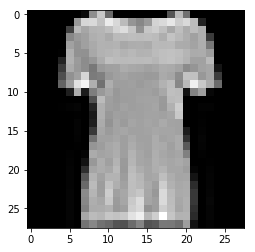

In [14]:
plt.imshow(np.reshape(X_train[10], (-1, 28)))
plt.gray()

# PCA (n_components = 50)

In [28]:
pca = PCA(n_components=80)
pca.fit(X_train)

X_train_reduced_1 = pca.transform(X_train)
X_test_reduced_1 = pca.transform(X_test)

print(np.sum(pca.explained_variance_ratio_))


print(X_train_reduced_1.shape)
print(X_test_reduced_1.shape)


0.8468725304267899
(60000, 80)
(10000, 80)


# Perceptron

In [46]:
losses = np.zeros(5)
for i in range(1,5):
    percy = perc.perceptron_model(i*5, 10,1)
    weights  = percy.train(X_train, Y_train )
    #print(weights)
    result = percy.predict(X_test, weights)

    result = result.reshape((10000,1))
    Y_test = Y_test.reshape((10000, 1)) 

    #print(Y_test)
    losses[i] = 1 - pu.model_accuracy(result, Y_test)
    print( "Accuracy:" , pu.model_accuracy(result, Y_test))
    print( "macro_average: ", pu.model_macro_average(result, Y_test, 10))
    print("micro_average: ", pu.model_micro_average(result, Y_test, 10))

0
1
2
3
4
5
6
7
8
9
Accuracy: 0.7811
macro_average:  [0.8169 0.7811 0.7986]
micro_average:  [0.7811 0.7811 0.7811]
0
1
2
3
4
5
6
7
8
9
Accuracy: 0.7974
macro_average:  [0.8075 0.7974 0.8024]
micro_average:  [0.7974 0.7974 0.7974]
0
1
2
3
4
5
6
7
8
9
Accuracy: 0.8084
macro_average:  [0.8178 0.8084 0.8131]
micro_average:  [0.8084 0.8084 0.8084]
0
1
2
3
4
5
6
7
8
9
Accuracy: 0.8078
macro_average:  [0.8124 0.8078 0.8101]
micro_average:  [0.8078 0.8078 0.8078]


In [47]:
print(losses)

[0.     0.2189 0.2026 0.1916 0.1922]


# Logistic Model

In [35]:
logist= logsoft.softmaxLogit( iterations = 20000, Lambda= 0.0, alpha = 0.045, num_classes =10)

logist.fit(X_train_reduced_1, Y_train)

In [36]:
result= logist.predict(X_test_reduced_1)

result = result.reshape((10000,))
Y_test = Y_test.reshape((10000,))

print( "Accuracy:" , pu.model_accuracy(result, Y_test))
print( "macro_average: ", pu.model_macro_average(result, Y_test, 10))
print("micro_average: ", pu.model_micro_average(result, Y_test, 10))
print( "f1: ", pu.model_f1(result, Y_test,10))
print("precision: ", pu.model_precision(result, Y_test,10))
print("recall:", pu.model_recall(result, Y_test,10))


Accuracy: 0.759
macro_average:  [0.7556 0.759  0.7573]
micro_average:  [0.759 0.759 0.759]
f1:  [[0.747 ]
 [0.9335]
 [0.6059]
 [0.7799]
 [0.5981]
 [0.8537]
 [0.3752]
 [0.8429]
 [0.8983]
 [0.8783]]
precision:  [[0.696 ]
 [0.9628]
 [0.5907]
 [0.7176]
 [0.5785]
 [0.9487]
 [0.5311]
 [0.8157]
 [0.8869]
 [0.8282]]
recall: [[0.806]
 [0.906]
 [0.622]
 [0.854]
 [0.619]
 [0.776]
 [0.29 ]
 [0.872]
 [0.91 ]
 [0.935]]


# FLDA

In [43]:
for i in range(3, 4):
    pca = PCA(n_components=i*100)
    pca.fit(X_train)
    X_train_reduced_1 = pca.transform(X_train)
    X_test_reduced_1 = pca.transform(X_test)
    print(np.sum(pca.explained_variance_ratio_))
    print(X_train_reduced_1.shape)
    print(X_test_reduced_1.shape)
    
    fld= mflda.flda(10)
    fld.train(X_train_reduced_1, Y_train)
    result = fld.predict(X_test_reduced_1)
    result = result.reshape((10000,))
    Y_test = Y_test.reshape((10000,))

    print( "Accuracy:" , pu.model_accuracy(result, Y_test))
    print( "macro_average: ", pu.model_macro_average(result, Y_test, 10))
    print("micro_average: ", pu.model_micro_average(result, Y_test, 10))
    print( "f1: ", pu.model_f1(result, Y_test,10))
    print("precision: ", pu.model_precision(result, Y_test,10))
    print("recall:", pu.model_recall(result, Y_test,10))

0.9612851613945299
(60000, 300)
(10000, 300)
Accuracy: 0.7978
macro_average:  [0.7972 0.7978 0.7975]
micro_average:  [0.7978 0.7978 0.7978]
f1:  [[0.7703]
 [0.9195]
 [0.6863]
 [0.7944]
 [0.6895]
 [0.87  ]
 [0.4798]
 [0.8872]
 [0.8755]
 [0.8957]]
precision:  [[0.7444]
 [0.8732]
 [0.7114]
 [0.7411]
 [0.683 ]
 [0.9104]
 [0.7877]
 [0.8672]
 [0.8025]
 [0.8514]]
recall: [[0.798]
 [0.971]
 [0.663]
 [0.856]
 [0.696]
 [0.833]
 [0.345]
 [0.908]
 [0.963]
 [0.945]]


# SVM


In [43]:
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train_reduced_1, Y_train)

result = clf.predict(X_test_reduced_1) 

result = result.reshape((10000,1))
Y_test = Y_test.reshape((10000, 1))
print( "Accuracy:" , pu.model_accuracy(result, Y_test))

Accuracy: 0.8394


In [44]:
print( "Accuracy:" , pu.model_accuracy(result, Y_test))
print( "macro_average: ", pu.model_macro_average(result, Y_test, 10))
print("micro_average: ", pu.model_micro_average(result, Y_test, 10))

Accuracy: 0.8394
macro_average:  [0.8368 0.8394 0.8381]
micro_average:  [0.8394 0.8394 0.8394]
